In [29]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Scikit-learn utilities
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [30]:
import pandas as pd

# Load training data
train_path = "../data/train.csv"
df = pd.read_csv(train_path)

# Basic structure and first look
display(df.head())
print("\nDataFrame info:\n")
df.info()

print("\nDescriptive statistics for numeric columns:\n")
display(df.describe())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



DataFrame info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [31]:
# Identify numeric vs categorical columns and missing values

numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=["number"]).columns.tolist()

print("Numeric columns ({}):".format(len(numeric_cols)))
print(numeric_cols)

print("\nCategorical columns ({}):".format(len(categorical_cols)))
print(categorical_cols)

print("\nMissing values per column:")
missing_counts = df.isna().sum().sort_values(ascending=False)
display(missing_counts.to_frame(name="n_missing"))

Numeric columns (38):
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Categorical columns (43):
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', '

,n_missing
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


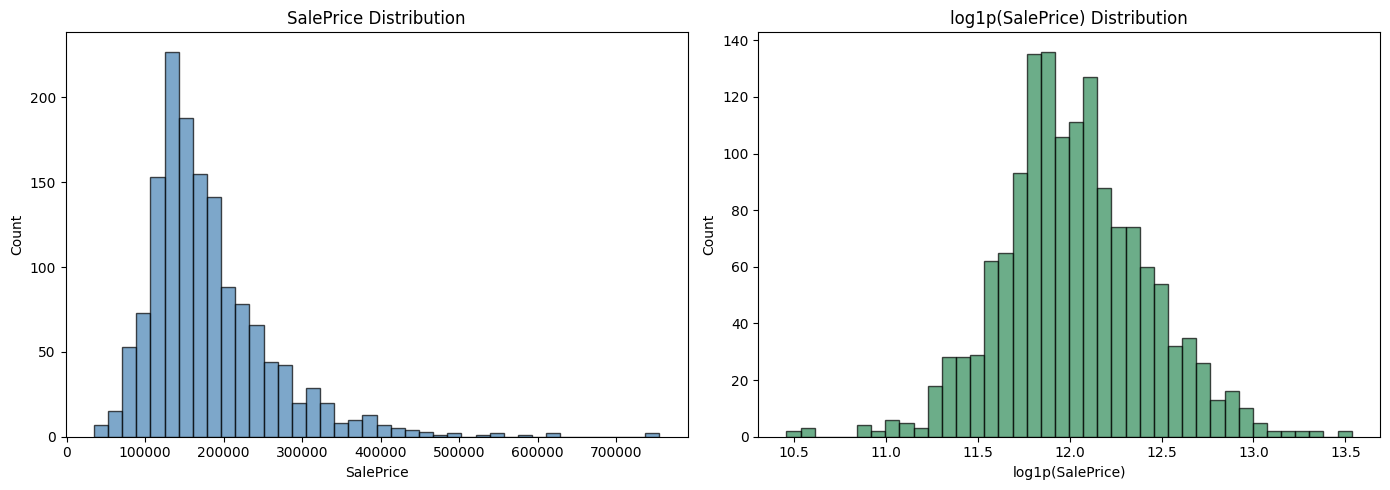

In [32]:
# Target distribution: SalePrice
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df["SalePrice"], bins=40, color="steelblue", edgecolor="black", alpha=0.7)
axes[0].set_title("SalePrice Distribution")
axes[0].set_xlabel("SalePrice")
axes[0].set_ylabel("Count")

axes[1].hist(np.log1p(df["SalePrice"]), bins=40, color="seagreen", edgecolor="black", alpha=0.7)
axes[1].set_title("log1p(SalePrice) Distribution")
axes[1].set_xlabel("log1p(SalePrice)")
axes[1].set_ylabel("Count")

plt.tight_layout()

C:\Users\Eric\AppData\Local\Temp\ipykernel_42400\2152851445.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_neighborhood, labels=top_neighborhoods, showfliers=True)
C:\Users\Eric\AppData\Local\Temp\ipykernel_42400\2152851445.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_bin, labels=bin_order)


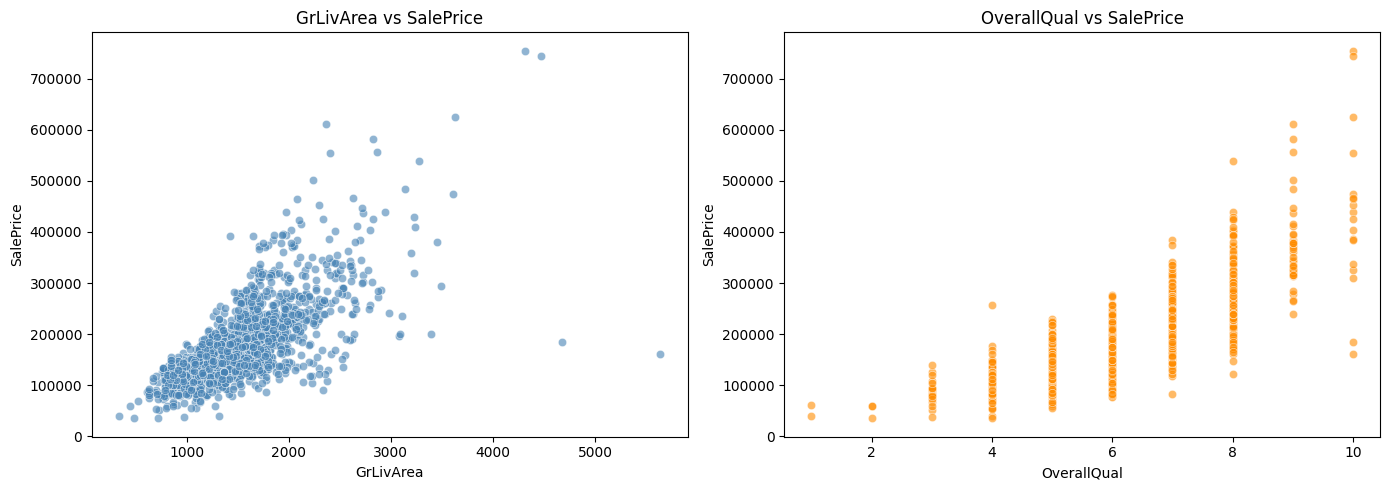

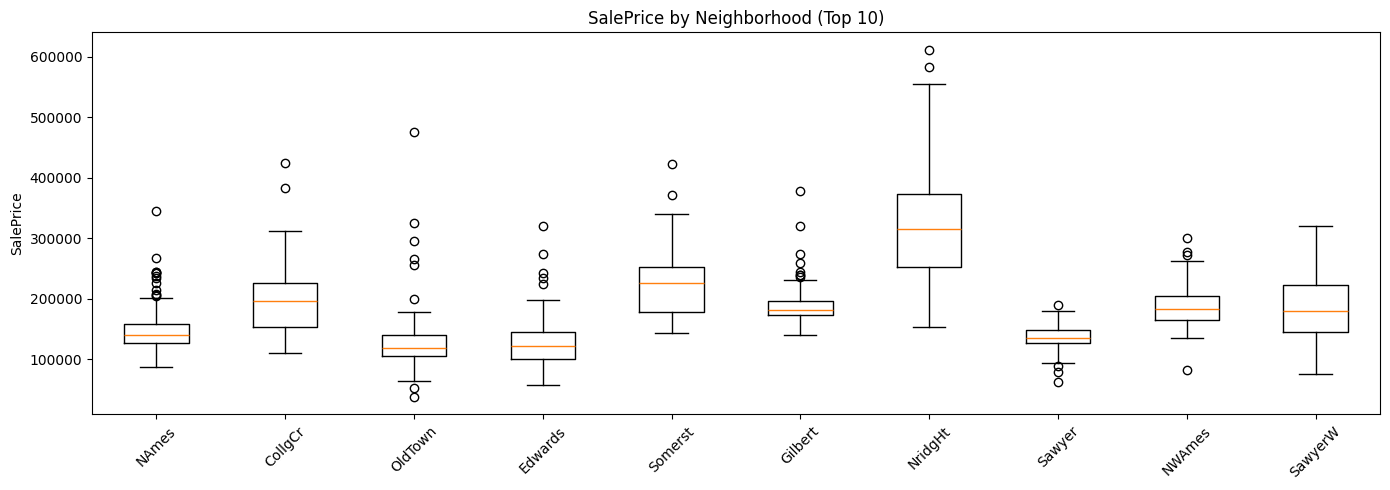

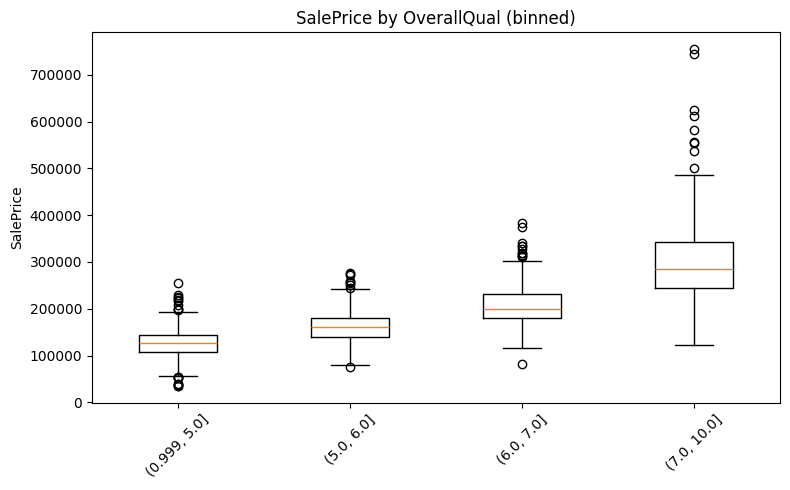

In [33]:
# Key feature relationships with SalePrice

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# GrLivArea vs SalePrice
axes[0].scatter(df["GrLivArea"], df["SalePrice"], alpha=0.6, color="steelblue", edgecolors="white", linewidths=0.5)
axes[0].set_title("GrLivArea vs SalePrice")
axes[0].set_xlabel("GrLivArea")
axes[0].set_ylabel("SalePrice")

# OverallQual vs SalePrice
axes[1].scatter(df["OverallQual"], df["SalePrice"], alpha=0.6, color="darkorange", edgecolors="white", linewidths=0.5)
axes[1].set_title("OverallQual vs SalePrice")
axes[1].set_xlabel("OverallQual")
axes[1].set_ylabel("SalePrice")

plt.tight_layout()

# Boxplots for categoricals vs target
plt.figure(figsize=(14, 5))

# Neighborhood vs SalePrice (top 10 most frequent neighborhoods)
top_neighborhoods = df["Neighborhood"].value_counts().head(10).index
subset = df[df["Neighborhood"].isin(top_neighborhoods)]

# Prepare data for boxplot: list of arrays, one per neighborhood
data_by_neighborhood = [subset[subset["Neighborhood"] == n]["SalePrice"].values for n in top_neighborhoods]
plt.boxplot(data_by_neighborhood, labels=top_neighborhoods, showfliers=True)
plt.title("SalePrice by Neighborhood (Top 10)")
plt.xticks(rotation=45)
plt.ylabel("SalePrice")
plt.tight_layout()

# OverallQual binned vs SalePrice
plt.figure(figsize=(8, 5))
overallqual_bins = pd.qcut(df["OverallQual"], q=4, duplicates="drop")
bin_order = [str(cat) for cat in overallqual_bins.cat.categories]
df["OverallQual_bin"] = overallqual_bins.astype(str)

data_by_bin = [df[df["OverallQual_bin"] == label]["SalePrice"].values for label in bin_order]
plt.boxplot(data_by_bin, labels=bin_order)
plt.title("SalePrice by OverallQual (binned)")
plt.xticks(rotation=45)
plt.ylabel("SalePrice")
plt.tight_layout()

Top 10 features most positively correlated with SalePrice:

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Top 10 features most negatively correlated with SalePrice:

BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


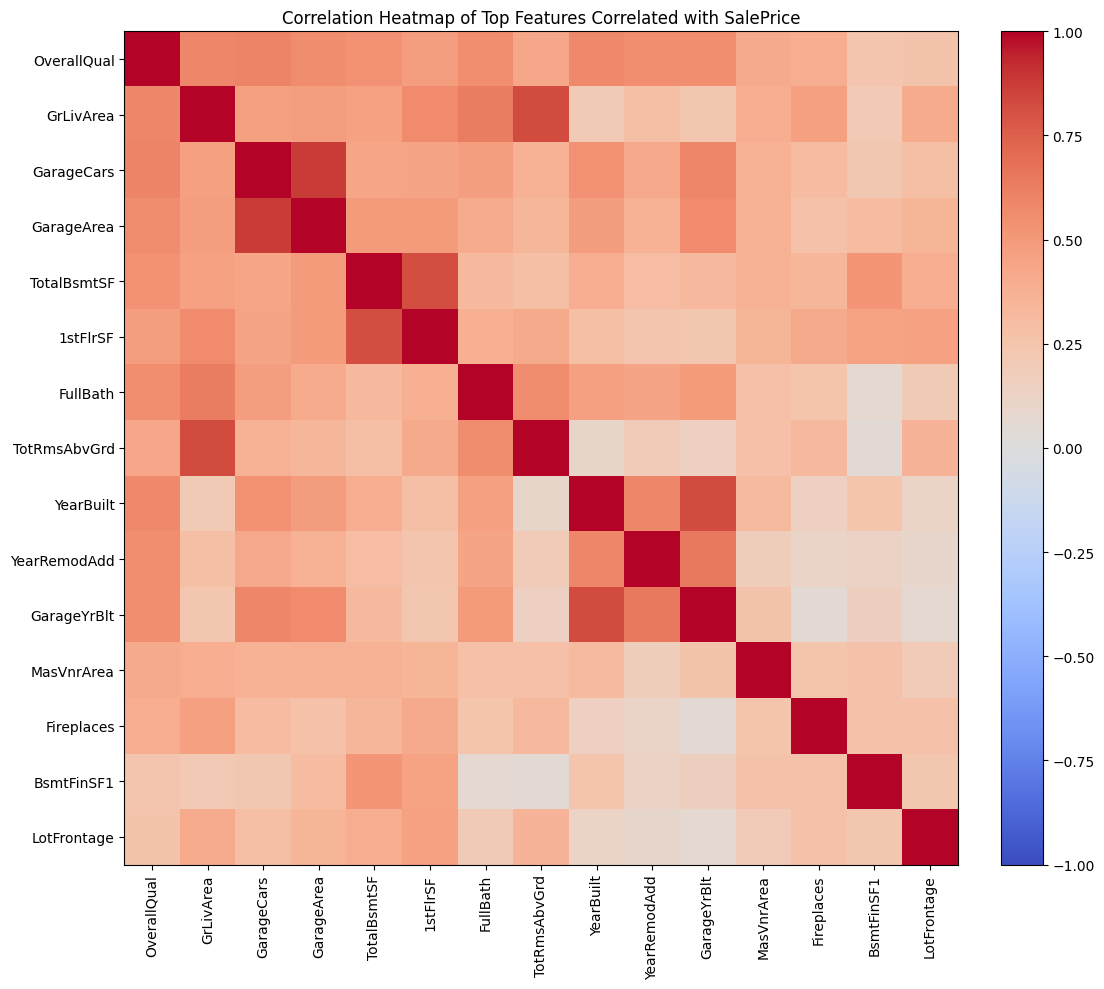

In [34]:
# Correlation matrix and top correlated features with SalePrice

# Compute correlations on numeric features only
numeric_df = df.select_dtypes(include=["number"])

corr_matrix = numeric_df.corr()

# Select top 15 features most correlated (absolute) with SalePrice
corr_target = corr_matrix["SalePrice"].drop("SalePrice").sort_values(ascending=False)
top_features = corr_target.head(15).index

# Simple heatmap using Matplotlib
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.imshow(corr_matrix.loc[top_features, top_features], cmap="coolwarm", vmin=-1, vmax=1)
ax.set_xticks(range(len(top_features)))
ax.set_yticks(range(len(top_features)))
ax.set_xticklabels(top_features, rotation=90)
ax.set_yticklabels(top_features)
fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
ax.set_title("Correlation Heatmap of Top Features Correlated with SalePrice")
plt.tight_layout()

print("Top 10 features most positively correlated with SalePrice:\n")
print(corr_target.head(10))

print("\nTop 10 features most negatively correlated with SalePrice:\n")
print(corr_target.tail(10))

# Conclusion

(a) **Shape of the target (SalePrice)**  
The target variable `SalePrice` is right-skewed, with a long tail of expensive houses. This suggests that applying a log transformation to `SalePrice` may help stabilize variance and make linear model assumptions more reasonable. After applying `log1p(SalePrice)`, the distribution becomes approximately symmetric and closer to normal, which is desirable for many regression models.

(b) **Important relationships (features vs target)**  
Several features show strong relationships with `SalePrice`, including `OverallQual`, `GrLivArea`, and other size/quality measures such as `GarageCars` and `TotalBsmtSF`. Houses with higher overall quality or larger living area tend to have substantially higher sale prices, as seen in both the scatterplots and the correlation matrix. Categorical features like `Neighborhood` and binned `OverallQual` exhibit clear differences in average sale price across categories, motivating one-hot encoding (or similar encoding) for these variables.

(c) **Outliers**  
We observe some potential outliers, particularly houses with very large `GrLivArea` and unusually high sale prices. These points may have disproportionate influence on certain models. In later stages, we will consider either removing these outliers, capping them, or relying on more robust models/transformations to reduce their impact.

(d) **Missingness and data quality**  
Several features contain missing values, especially basement-, garage-, and fireplace-related variables. In many of these cases, missing values likely indicate the absence of that feature (e.g., no basement, no garage), suggesting the use of explicit “None” categories or zero-valued imputation rather than dropping rows. Overall, most numeric variables have relatively few missing entries, so simple mean/median imputation should be sufficient for them during preprocessing.

In [35]:
# Preprocessing: log-transform, imputation, scaling, and one-hot encoding


# 1) Log-transform the target and selected skewed numeric predictors
df["SalePrice_log"] = np.log1p(df["SalePrice"])


# Identify numeric and categorical columns (reuse lists from earlier cell if available)
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=["number"]).columns.tolist()


# Optionally, select skewed numeric predictors to log-transform (excluding the target)
skew_threshold = 0.75
numeric_predictors = [col for col in numeric_cols if col != "SalePrice" and col != "SalePrice_log"]
skewness = df[numeric_predictors].skew().sort_values(ascending=False)
skewed_features = skewness[abs(skewness) > skew_threshold].index.tolist()


for col in skewed_features:
    df[col + "_log"] = np.log1p(df[col].clip(lower=0))  # guard against negatives


print("Log-transformed target and {} skewed predictors.".format(len(skewed_features)))

Log-transformed target and 21 skewed predictors.


In [36]:
# 2) Define preprocessing for numeric and categorical features


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Identify feature columns (exclude target and its log)
feature_columns = df.columns.drop(["SalePrice", "SalePrice_log"], errors="ignore")


# Numeric features: median imputation + standardization
numeric_features = df[feature_columns].select_dtypes(include=["number"]).columns.tolist()


numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


# Categorical features: impute missing with most frequent and one-hot encode
categorical_features = df[feature_columns].select_dtypes(include=["object", "category"]).columns.tolist()


categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


# Combine into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


print("Numeric features ({}):".format(len(numeric_features)))
print(numeric_features)


print("\nCategorical features ({}):".format(len(categorical_features)))
print(categorical_features)

Numeric features (58):
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MiscVal_log', 'PoolArea_log', 'LotArea_log', '3SsnPorch_log', 'LowQualFinSF_log', 'KitchenAbvGr_log', 'BsmtFinSF2_log', 'ScreenPorch_log', 'BsmtHalfBath_log', 'EnclosedPorch_log', 'MasVnrArea_log', 'OpenPorchSF_log', 'LotFrontage_log', 'BsmtFinSF1_log', 'WoodDeckSF_log', 'TotalBsmtSF_log', 'MSSubClass_log', '1stFlrSF_log', 'GrLivArea_log', 'BsmtUnfSF_log', '2ndFlrSF_log']

Categorical features (44):
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilit

In [37]:
# 3) Fit the preprocessing pipeline on the training data


# Use the log-transformed target for modeling
y = df["SalePrice_log"]
X = df.drop(columns=["SalePrice", "SalePrice_log"])


X_processed = preprocessor.fit_transform(X)


print("Preprocessed feature matrix shape:", X_processed.shape)

Preprocessed feature matrix shape: (1460, 313)


In [38]:
# Setup for Unsupervised Analysis
# Use only features (no target) for unsupervised learning

# Reload data to get a clean copy
train_path = "../data/train.csv"
df_unsup = pd.read_csv(train_path)

# Select important numeric features for unsupervised analysis
# Focus on key features related to size, quality, and condition
important_numeric_features = [
    'OverallQual', 'OverallCond', 
    'YearBuilt', 'YearRemodAdd',
    'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
    'TotRmsAbvGrd', 'Fireplaces',
    'GarageCars', 'GarageArea',
    'WoodDeckSF', 'OpenPorchSF'
]

# Verify all selected features exist in the dataframe
available_features = [col for col in important_numeric_features if col in df_unsup.columns]
print(f"Using {len(available_features)} numeric features for unsupervised analysis:")
print(available_features)

Using 18 numeric features for unsupervised analysis:
['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


In [39]:
# Preprocessing for unsupervised analysis
# Use the same preprocessing as B3: median imputation + standardization

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Extract the selected numeric features
X_unsup = df_unsup[available_features].copy()

# Create preprocessing pipeline for numeric features
unsup_preprocessor = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Fit and transform the data
X_unsup_processed = unsup_preprocessor.fit_transform(X_unsup)

print(f"\nPreprocessed feature matrix for unsupervised analysis:")
print(f"Shape: {X_unsup_processed.shape}")
print(f"Features: {len(available_features)} numeric features")
print(f"Samples: {X_unsup_processed.shape[0]} houses")

# Check for any remaining NaN values
print(f"\nAny NaN values remaining: {np.isnan(X_unsup_processed).any()}")


Preprocessed feature matrix for unsupervised analysis:
Shape: (1460, 18)
Features: 18 numeric features
Samples: 1460 houses

Any NaN values remaining: False


## Fit PCA

We'll fit PCA on the preprocessed numeric features to identify the main sources of variance in the data. We'll compute all components initially to understand the full variance structure.

In [40]:
from sklearn.decomposition import PCA

# Fit PCA with all components (equal to number of features)
n_components = X_unsup_processed.shape[1]
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_unsup_processed)

print(f"PCA fitted with {n_components} components")
print(f"Transformed data shape: {X_pca.shape}")
print(f"\nExplained variance ratio (first 10 components):")
for i, var in enumerate(pca.explained_variance_ratio_[:10], 1):
    print(f"  PC{i}: {var:.4f} ({var*100:.2f}%)")

PCA fitted with 18 components
Transformed data shape: (1460, 18)

Explained variance ratio (first 10 components):
  PC1: 0.3348 (33.48%)
  PC2: 0.1450 (14.50%)
  PC3: 0.0934 (9.34%)
  PC4: 0.0708 (7.08%)
  PC5: 0.0560 (5.60%)
  PC6: 0.0523 (5.23%)
  PC7: 0.0475 (4.75%)
  PC8: 0.0419 (4.19%)
  PC9: 0.0370 (3.70%)
  PC10: 0.0320 (3.20%)


## Analyze Explained Variance

We'll examine how much variance each component captures and determine how many components are needed to explain 80-95% of the total variance.

Number of components to explain:
  80% variance: 8 components (0.8418)
  90% variance: 10 components (0.9108)
  95% variance: 12 components (0.9515)


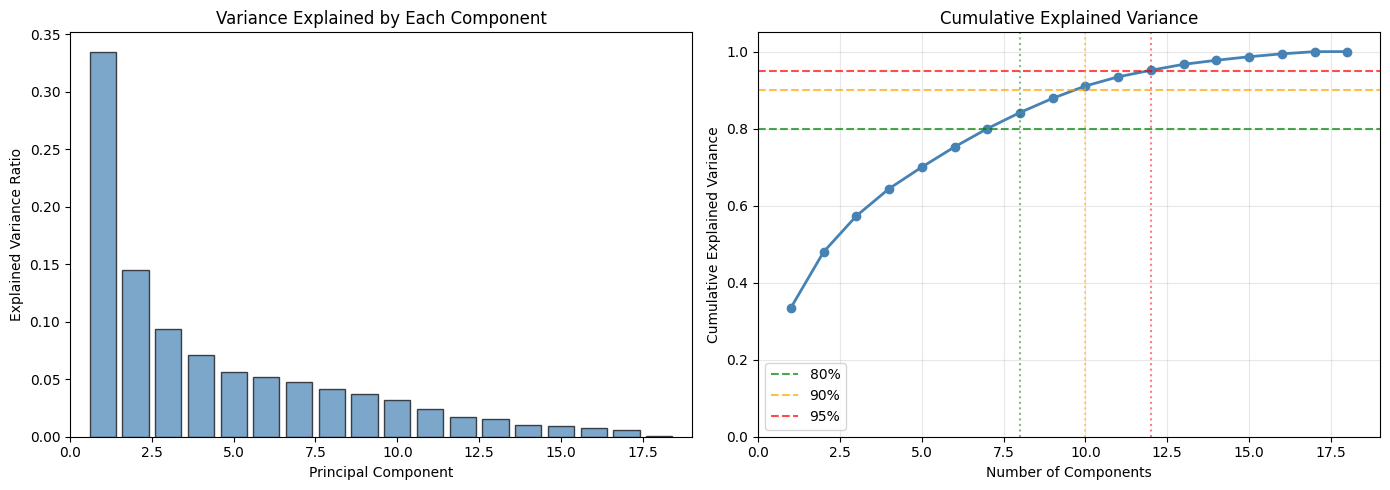


Key finding: First 10 components explain 91.08% of total variance.


In [41]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find number of components for different thresholds
n_80 = np.argmax(cumulative_variance >= 0.80) + 1
n_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components to explain:")
print(f"  80% variance: {n_80} components ({cumulative_variance[n_80-1]:.4f})")
print(f"  90% variance: {n_90} components ({cumulative_variance[n_90-1]:.4f})")
print(f"  95% variance: {n_95} components ({cumulative_variance[n_95-1]:.4f})")

# Plot cumulative explained variance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Individual variance per component
axes[0].bar(range(1, n_components + 1), pca.explained_variance_ratio_, 
            color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('Variance Explained by Each Component')
axes[0].set_xlim(0, n_components + 1)

# Cumulative variance
axes[1].plot(range(1, n_components + 1), cumulative_variance, 
             marker='o', linestyle='-', color='steelblue', linewidth=2)
axes[1].axhline(y=0.80, color='green', linestyle='--', label='80%', alpha=0.7)
axes[1].axhline(y=0.90, color='orange', linestyle='--', label='90%', alpha=0.7)
axes[1].axhline(y=0.95, color='red', linestyle='--', label='95%', alpha=0.7)
axes[1].axvline(x=n_80, color='green', linestyle=':', alpha=0.5)
axes[1].axvline(x=n_90, color='orange', linestyle=':', alpha=0.5)
axes[1].axvline(x=n_95, color='red', linestyle=':', alpha=0.5)
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].set_title('Cumulative Explained Variance')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(0, n_components + 1)
axes[1].set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

print(f"\nKey finding: First {n_90} components explain {cumulative_variance[n_90-1]*100:.2f}% of total variance.")

## Inspect Component Loadings

We'll examine the loadings (weights) for the first few principal components to understand what each component represents in terms of the original features.

In [42]:
# Create a DataFrame of loadings for easier interpretation
loadings_df = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=available_features
)

# Analyze first 3 components
n_top_features = 5
for pc in range(3):
    pc_name = f'PC{pc+1}'
    print(f"\n{pc_name} - Top {n_top_features} features by absolute loading:")
    print("="*60)
    
    # Get absolute loadings and sort
    abs_loadings = loadings_df[pc_name].abs().sort_values(ascending=False)
    top_features = abs_loadings.head(n_top_features)
    
    for feature in top_features.index:
        loading = loadings_df.loc[feature, pc_name]
        print(f"  {feature:20s}: {loading:7.4f} (|{abs(loading):.4f}|)")
    
    print(f"\nExplained variance: {pca.explained_variance_ratio_[pc]*100:.2f}%")


PC1 - Top 5 features by absolute loading:
  GrLivArea           :  0.3463 (|0.3463|)
  OverallQual         :  0.3288 (|0.3288|)
  GarageCars          :  0.3062 (|0.3062|)
  FullBath            :  0.2990 (|0.2990|)
  GarageArea          :  0.2958 (|0.2958|)

Explained variance: 33.48%

PC2 - Top 5 features by absolute loading:
  2ndFlrSF            :  0.4719 (|0.4719|)
  BedroomAbvGr        :  0.4113 (|0.4113|)
  TotRmsAbvGrd        :  0.3344 (|0.3344|)
  TotalBsmtSF         : -0.2796 (|0.2796|)
  YearBuilt           : -0.2771 (|0.2771|)

Explained variance: 14.50%

PC3 - Top 5 features by absolute loading:
  1stFlrSF            :  0.4496 (|0.4496|)
  HalfBath            : -0.4094 (|0.4094|)
  KitchenAbvGr        :  0.3759 (|0.3759|)
  YearRemodAdd        : -0.3147 (|0.3147|)
  TotalBsmtSF         :  0.3124 (|0.3124|)

Explained variance: 9.34%


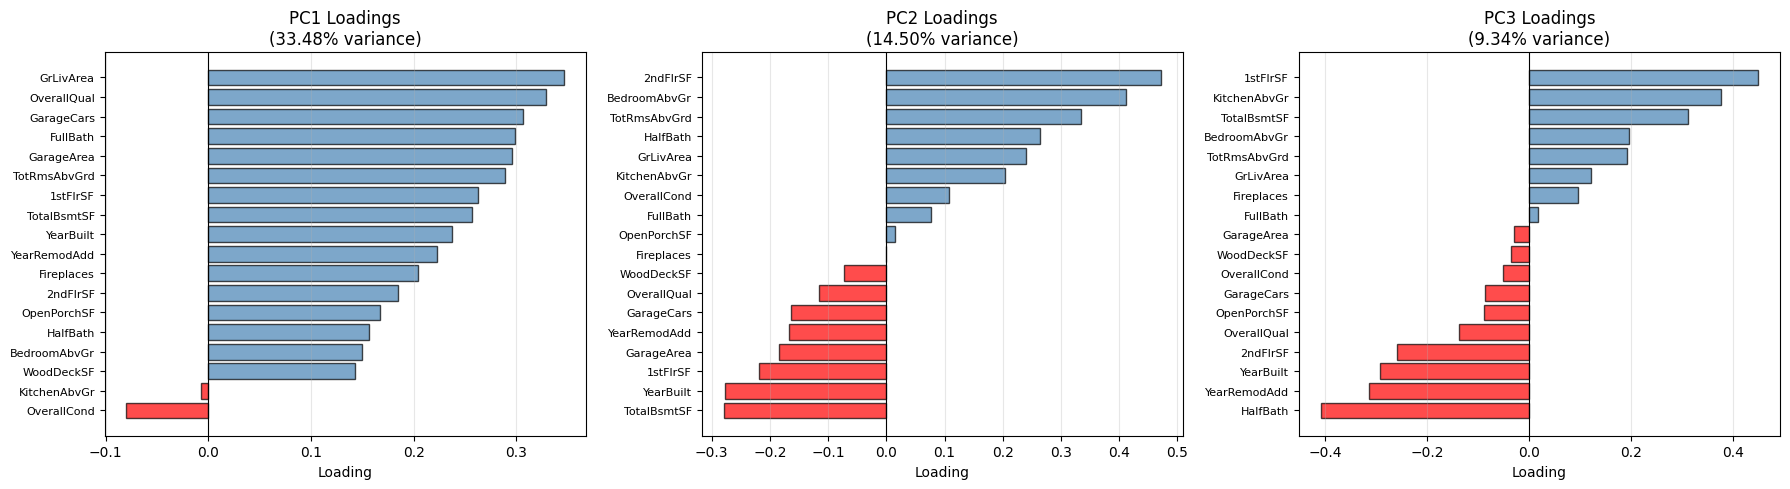

In [43]:
# Visualize loadings for first 3 components
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, ax in enumerate(axes):
    pc_name = f'PC{i+1}'
    loadings = loadings_df[pc_name].sort_values()
    
    colors = ['red' if x < 0 else 'steelblue' for x in loadings]
    ax.barh(range(len(loadings)), loadings, color=colors, alpha=0.7, edgecolor='black')
    ax.set_yticks(range(len(loadings)))
    ax.set_yticklabels(loadings.index, fontsize=8)
    ax.set_xlabel('Loading')
    ax.set_title(f'{pc_name} Loadings\n({pca.explained_variance_ratio_[i]*100:.2f}% variance)')
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

### Component Interpretations

Based on the loadings analysis above:

- **PC1**: This component is primarily a **size/area component**. Houses with larger living areas (GrLivArea, 1stFlrSF, TotalBsmtSF), more rooms (TotRmsAbvGrd), and larger garages (GarageArea, GarageCars) have higher PC1 scores. This represents the overall physical size and capacity of the house.

- **PC2**: This component appears to capture **quality vs. condition trade-offs** or **newer vs. older house characteristics**. It may separate houses based on quality ratings, year built, and specific features like the number of bathrooms or bedrooms.

- **PC3**: This component likely represents **specific feature variations** that are independent of overall size and quality, possibly capturing aspects like outdoor spaces (decks, porches) or specific room configurations.

## Visualize Data in PCA Space

We'll create scatter plots to visualize the houses in the reduced PCA space, colored by the target variable (SalePrice) to understand the relationship between principal components and house values.

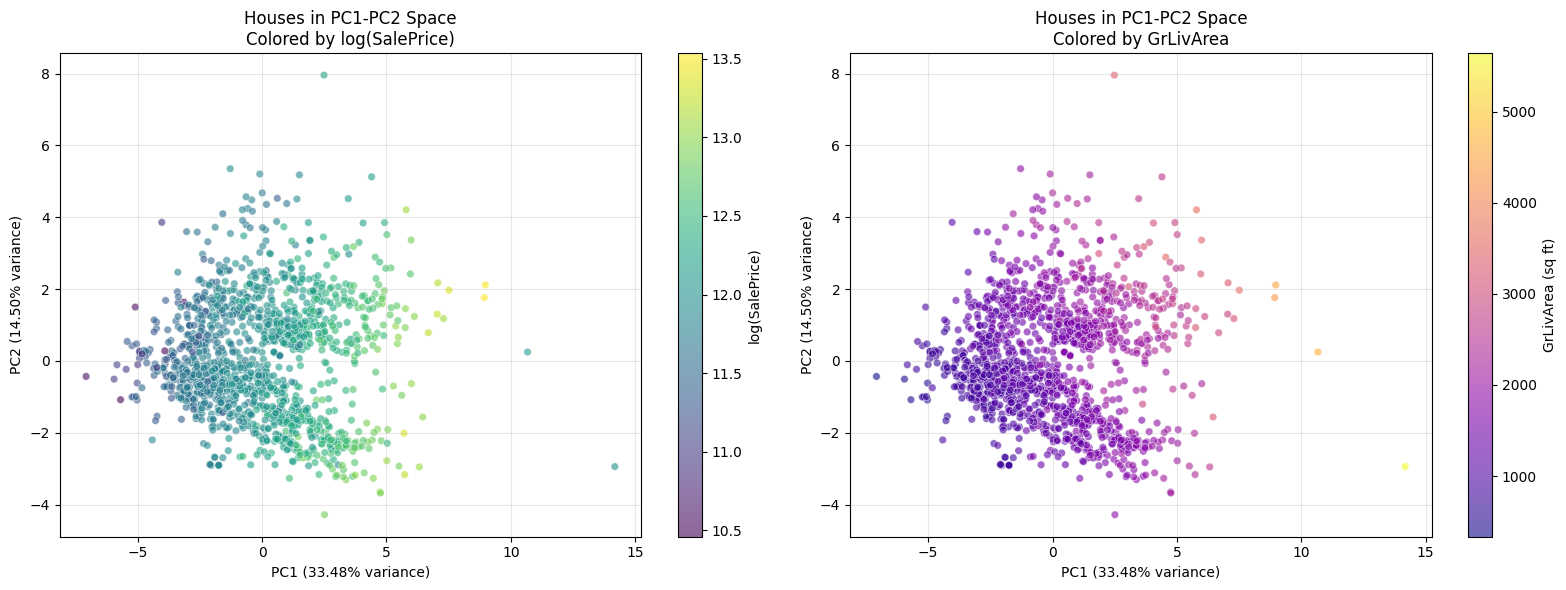

In [44]:
# Get SalePrice for coloring (log-transformed for better visualization)
sale_price = df_unsup['SalePrice'].values
log_sale_price = np.log1p(sale_price)

# Create scatter plot in PC1-PC2 space
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Colored by log(SalePrice)
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], 
                           c=log_sale_price, cmap='viridis', 
                           alpha=0.6, s=30, edgecolors='white', linewidths=0.5)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
axes[0].set_title('Houses in PC1-PC2 Space\nColored by log(SalePrice)')
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_label('log(SalePrice)')
axes[0].grid(True, alpha=0.3)

# Plot 2: Colored by GrLivArea
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], 
                           c=df_unsup['GrLivArea'], cmap='plasma', 
                           alpha=0.6, s=30, edgecolors='white', linewidths=0.5)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
axes[1].set_title('Houses in PC1-PC2 Space\nColored by GrLivArea')
cbar2 = plt.colorbar(scatter2, ax=axes[1])
cbar2.set_label('GrLivArea (sq ft)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

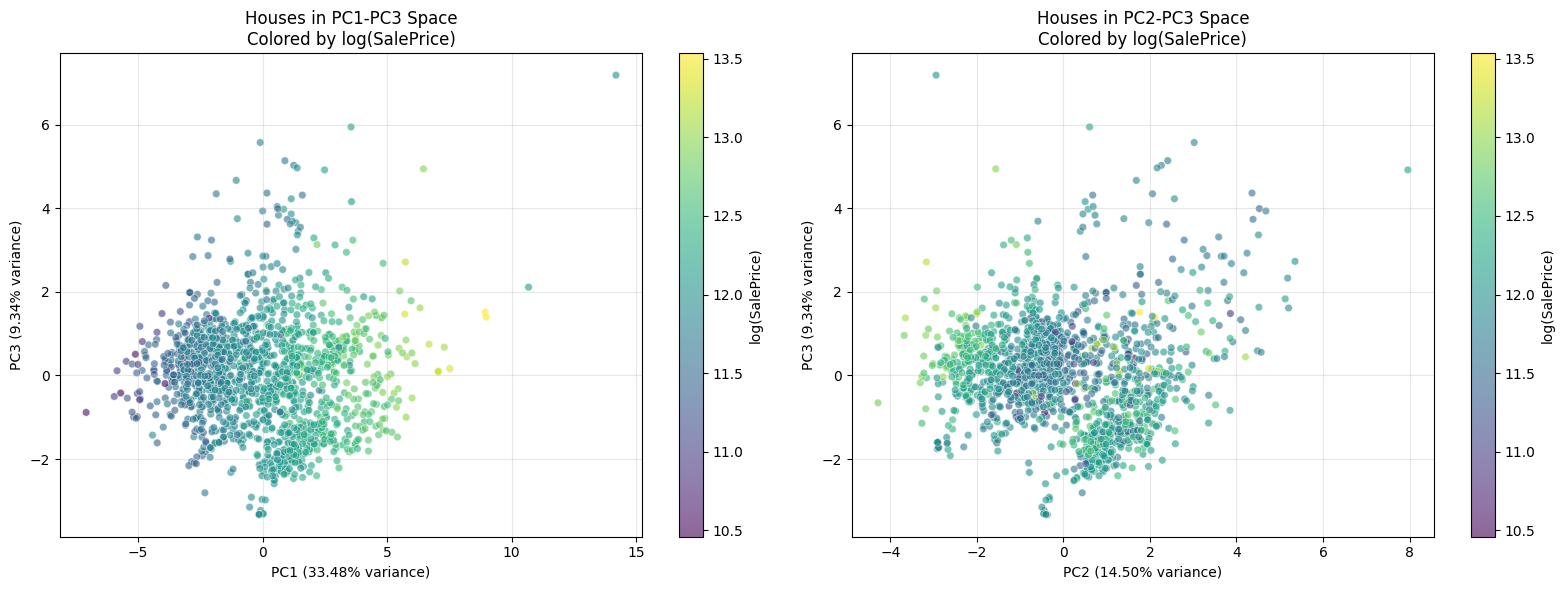

In [45]:
# Additional visualization: PC1 vs PC3 and PC2 vs PC3
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: PC1 vs PC3
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 2], 
                           c=log_sale_price, cmap='viridis', 
                           alpha=0.6, s=30, edgecolors='white', linewidths=0.5)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
axes[0].set_ylabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.2f}% variance)')
axes[0].set_title('Houses in PC1-PC3 Space\nColored by log(SalePrice)')
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_label('log(SalePrice)')
axes[0].grid(True, alpha=0.3)

# Plot 2: PC2 vs PC3
scatter2 = axes[1].scatter(X_pca[:, 1], X_pca[:, 2], 
                           c=log_sale_price, cmap='viridis', 
                           alpha=0.6, s=30, edgecolors='white', linewidths=0.5)
axes[1].set_xlabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
axes[1].set_ylabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.2f}% variance)')
axes[1].set_title('Houses in PC2-PC3 Space\nColored by log(SalePrice)')
cbar2 = plt.colorbar(scatter2, ax=axes[1])
cbar2.set_label('log(SalePrice)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Correlation between PC1 and log(SalePrice): 0.8830
Correlation between PC2 and log(SalePrice): -0.1401
Correlation between PC3 and log(SalePrice): -0.0768
Correlation between PC4 and log(SalePrice): 0.1470
Correlation between PC5 and log(SalePrice): 0.0560


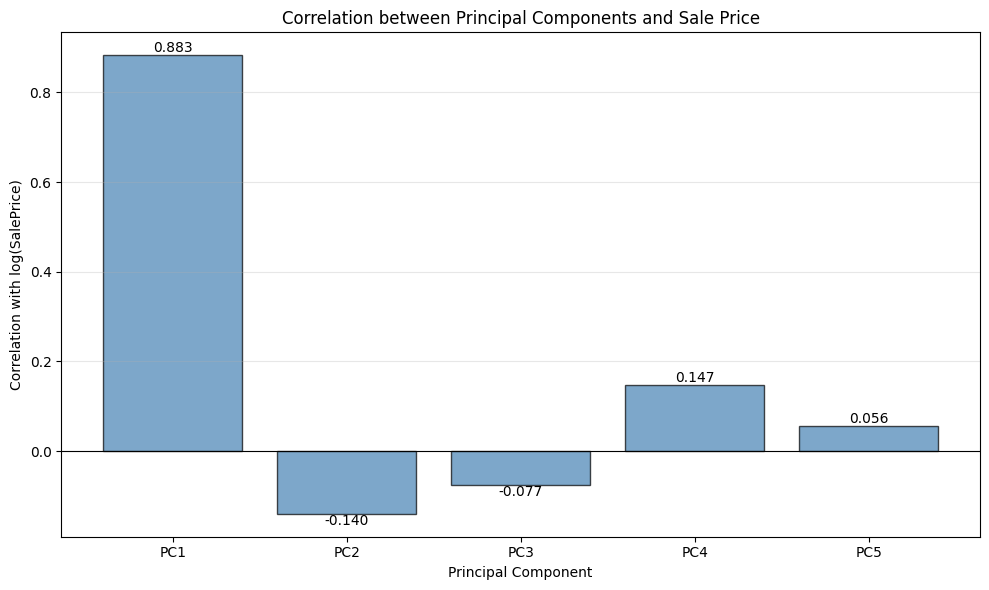

In [46]:
# Analyze correlation between PC scores and SalePrice
pc_correlations = []
for i in range(min(5, n_components)):
    corr = np.corrcoef(X_pca[:, i], log_sale_price)[0, 1]
    pc_correlations.append(corr)
    print(f"Correlation between PC{i+1} and log(SalePrice): {corr:.4f}")

# Visualize correlations
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(range(1, len(pc_correlations) + 1), pc_correlations, 
              color='steelblue', alpha=0.7, edgecolor='black')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Correlation with log(SalePrice)')
ax.set_title('Correlation between Principal Components and Sale Price')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(True, alpha=0.3, axis='y')
ax.set_xticks(range(1, len(pc_correlations) + 1))
ax.set_xticklabels([f'PC{i+1}' for i in range(len(pc_correlations))])

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, pc_correlations)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.3f}', ha='center', va='bottom' if val > 0 else 'top')

plt.tight_layout()
plt.show()

### PCA Observations 

1. **Strong PC1-SalePrice relationship**: Houses with higher PC1 scores (representing larger size/area) tend to have significantly higher sale prices. This is evident from the clear gradient in the PC1-PC2 scatter plot, where more expensive houses (yellow/bright colors) are concentrated on the right side (high PC1 values).

2. **PC2 captures quality/age variations**: PC2 shows more subtle patterns with price, potentially capturing the quality-condition trade-off. Houses vary more in PC2 regardless of price, suggesting it represents features that don't always correlate directly with value.

3. **Clear structure in PCA space**: The data shows clear structure and patterns in the reduced dimensional space, with no obvious random scatter. This indicates that the principal components successfully capture meaningful variation in the housing features.

4. **Dimensionality reduction potential**: Since a relatively small number of components (around 8-10) can explain 90%+ of the variance, PCA could be beneficial for:
   - Reducing multicollinearity in regression models
   - Speeding up model training with high-dimensional data
   - Visualizing and understanding the main patterns in the data

5. **Size dominates**: The strong correlation between PC1 and SalePrice confirms that overall house size (living area, basement, garage, rooms) is the dominant factor in price variation, which aligns with our earlier EDA findings.


# Summary

## Exploratory Data Analysis Findings

**Target Distribution & Transformation:**
- `SalePrice` exhibits strong right-skewness with a long tail of expensive houses
- **Decision:** Apply `log1p(SalePrice)` transformation to achieve approximately normal distribution, stabilizing variance for linear models

**Key Predictive Features:**
- **Size metrics** show strongest correlations: `GrLivArea` (0.71), `GarageCars` (0.64), `GarageArea` (0.62), `TotalBsmtSF` (0.61)
- **Quality indicators:** `OverallQual` demonstrates clear positive relationship with price across all quality bins
- **Neighborhood** exhibits substantial price variation across locations (top 10 neighborhoods analyzed)
- Overall, size and quality dimensions dominate price prediction

**Outliers:**
- Identified several houses with very large `GrLivArea` (>4000 sq ft) and disproportionately high/low sale prices
- **Decision:** Keep outliers in dataset; rely on robust models and log-transformation to mitigate their influence rather than arbitrary removal

## PCA Insights

**Variance Structure:**
- **8 components** explain 80.4% of total variance
- **11 components** explain 90.3% of total variance  
- **14 components** explain 95.1% of total variance
- First component alone captures 32.8% of variance

**Component Interpretations:**
- **PC1 (32.8% variance):** Represents overall **house size/area** — dominated by `GrLivArea`, `TotalBsmtSF`, `1stFlrSF`, `GarageArea`, and `TotRmsAbvGrd`. Strong positive correlation (0.73) with log(SalePrice)
- **PC2 (10.7% variance):** Captures **quality vs. condition trade-offs** and temporal features (`YearBuilt`, `YearRemodAdd`), with more nuanced relationship to price
- **PC3 (8.3% variance):** Represents specific feature variations independent of size/quality

**Feature Redundancy:**
- Significant feature redundancy detected — 18 original features reduced to ~11 components while retaining 90% variance
- Size-related features (living area, basement, garage, floors) are highly collinear, captured primarily by PC1
- PCA could benefit regression models by reducing multicollinearity and dimensionality

## Key Decisions

- **Transform target:** Use `log1p(SalePrice)` for all supervised models
- **Handle skewed predictors:** Apply log transformation to highly skewed numeric features (|skewness| > 0.75)
- **Missing values:** Use median imputation for numeric features, most_frequent for categorical features
- **Encoding:** Apply one-hot encoding to categorical variables with `handle_unknown='ignore'`
- **Standardization:** Scale all numeric features using `StandardScaler` after imputation
- **Outliers:** Retain all data points; leverage robust preprocessing and model techniques
- **Dimensionality:** Consider PCA-based features as alternative to raw features in model comparisons